In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from statsmodels.stats.api import jarque_bera
from scipy.stats import spearmanr,mannwhitneyu,kruskal
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,auc,confusion_matrix,classification_report,roc_curve


In [3]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.3.1


In [4]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')

In [5]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [6]:
# CustomerID and Name doesnt add value hence dropping
df.drop(['CustomerID','Name'],axis=1,inplace=True)

In [7]:
print('No. of Rows =',df.shape[0],'\nNo. of Columns =',df.shape[1])

No. of Rows = 100000 
No. of Columns = 7


In [8]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [9]:
df.dtypes

Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [10]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [11]:
df_num = df.select_dtypes(include=np.number)

In [12]:
df.describe(include=object)

,Gender,Location
count,100000,100000
unique,2,5
top,Female,Houston
freq,50216,20157


In [13]:
df_num.drop('Churn',axis = 1,inplace=True)

In [14]:
df_num

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,17,73.36,236
1,62,1,48.76,172
2,24,5,85.47,460
3,36,3,97.94,297
4,46,19,58.14,266
...,...,...,...,...
99995,33,23,55.13,226
99996,62,19,61.65,351
99997,64,17,96.11,251
99998,51,20,49.25,434


In [15]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


# No null values

In [17]:
df.isna().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [18]:
# No null values

# Outliers

In [19]:
numerical_columns =df_num.columns
q1 = df[numerical_columns].quantile(0.25)
q3 = df[numerical_columns].quantile(0.75)
iqr= q3-q1
ll = q1-(1.5*iqr)
ul =q3 +(1.5*iqr)

In [20]:
outliers = ((df[numerical_columns] < ll) | (df[numerical_columns] > ul)).any(axis=1)

In [21]:
df[outliers]

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


In [22]:
# No outliers

# Correlation

C:\Users\Admin\AppData\Local\Temp\ipykernel_8632\1834425532.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

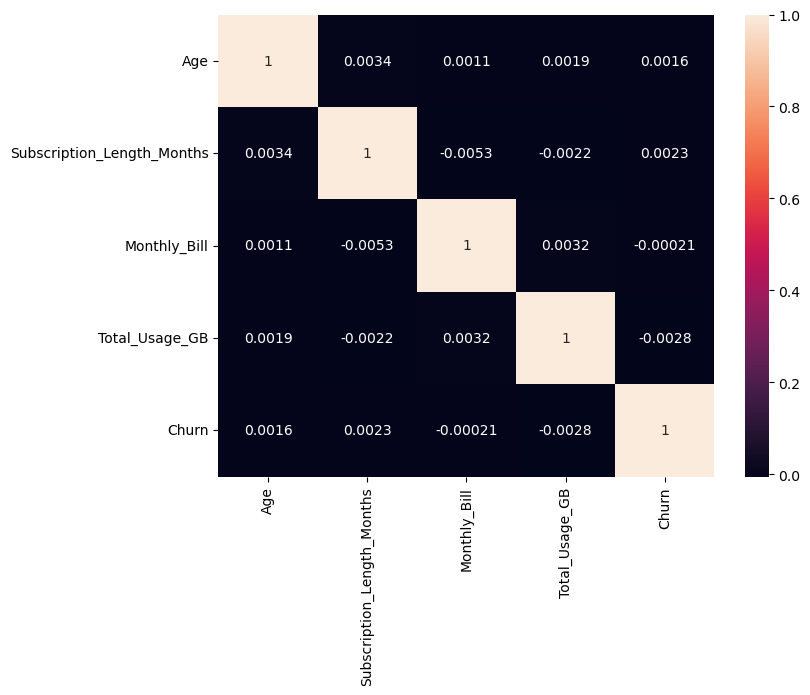

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [24]:
# By seeing above heatmap no feature is strongly correlated with target

# Univariate analysis

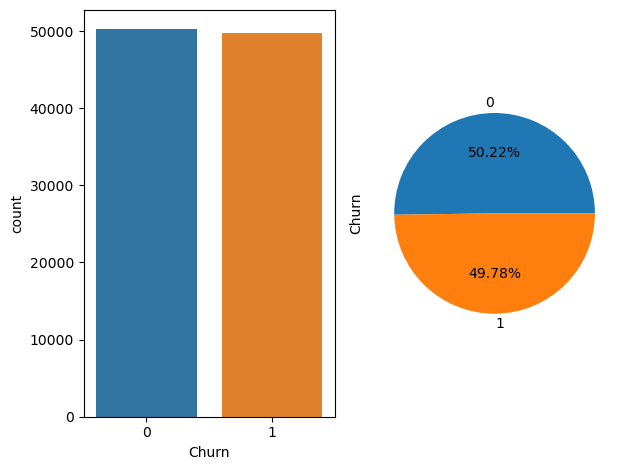

In [25]:
plt.subplot(1,2,1)
sns.countplot(df,x='Churn')
plt.subplot(1,2,2)
df['Churn'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.tight_layout()
plt.show()

In [26]:
df.Churn.value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [27]:
def kde(feature):
    print(f'kde plot of {feature}:')
    sns.kdeplot(data=df_num,x=i)
    plt.show()
    

kde plot of Age:


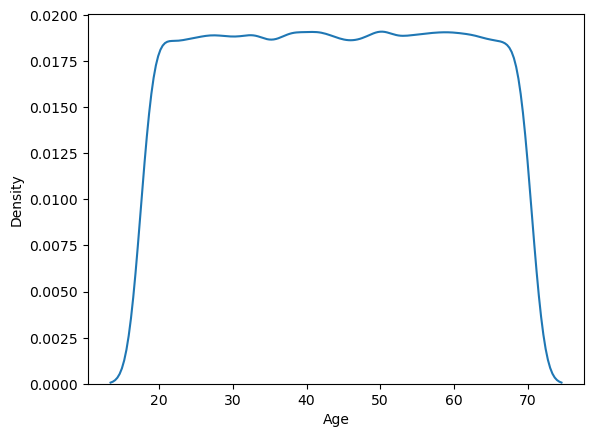

kde plot of Subscription_Length_Months:


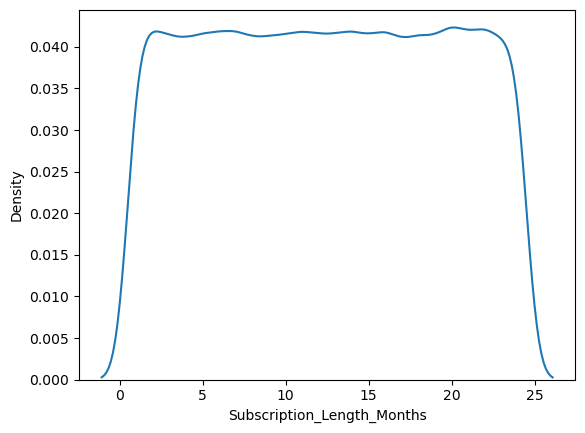

kde plot of Monthly_Bill:


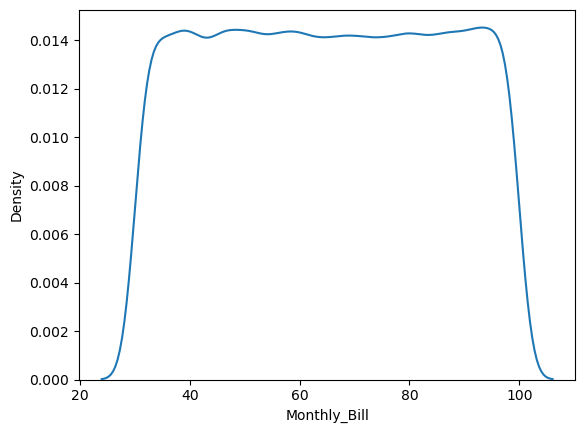

kde plot of Total_Usage_GB:


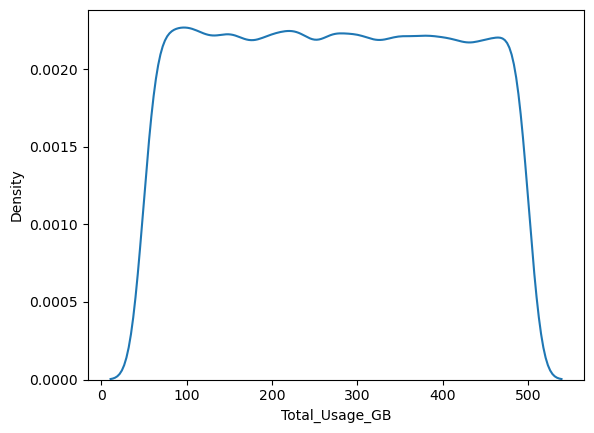

In [28]:
for i in df_num.columns:
    kde(i)
    

In [29]:
def box(feature):
    print(f'box plot of {feature}:')
    sns.boxplot(data=df_num,x=i)
    plt.show()
    

box plot of Age:


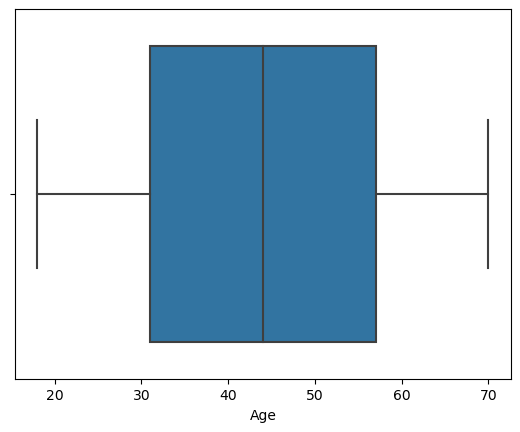

box plot of Subscription_Length_Months:


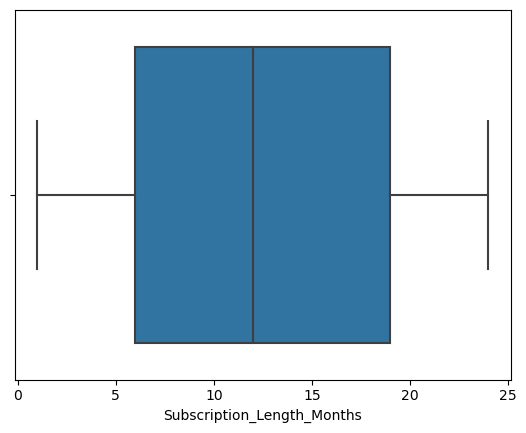

box plot of Monthly_Bill:


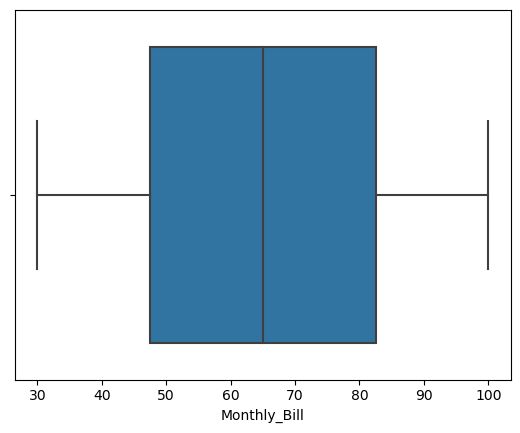

box plot of Total_Usage_GB:


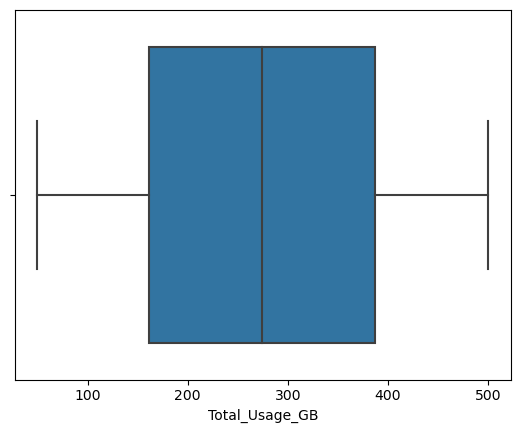

In [30]:
for i in df_num.columns:
    box(i)

# Bivariate analysis

In [31]:

def box1(feature):
    print(f'box plot of {feature}:')
    sns.boxplot(data=df_num,x=df['Churn'],y=i)
    plt.show()

box plot of Age:


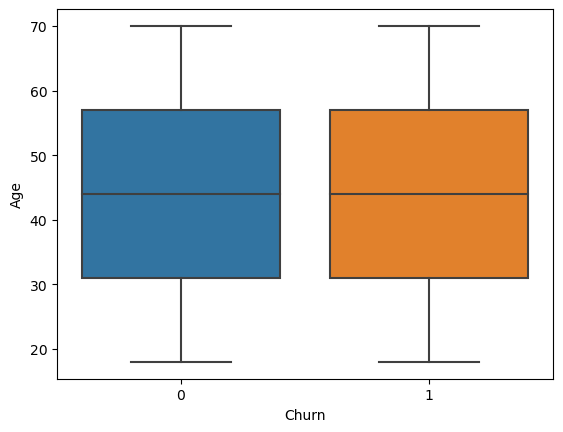

box plot of Subscription_Length_Months:


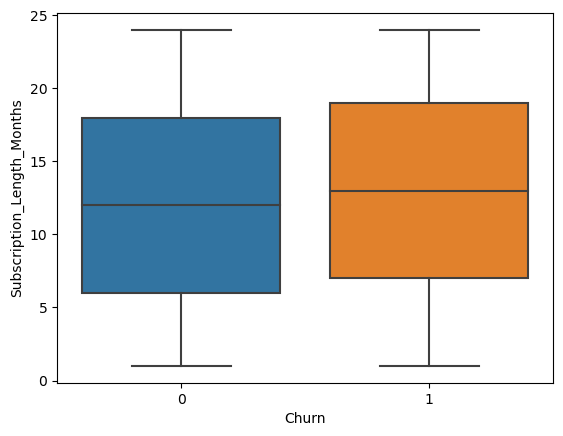

box plot of Monthly_Bill:


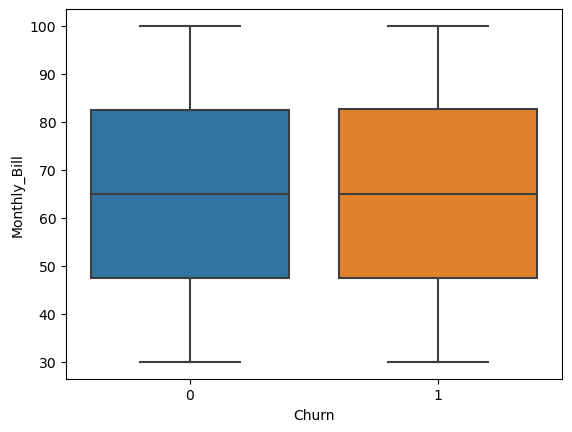

box plot of Total_Usage_GB:


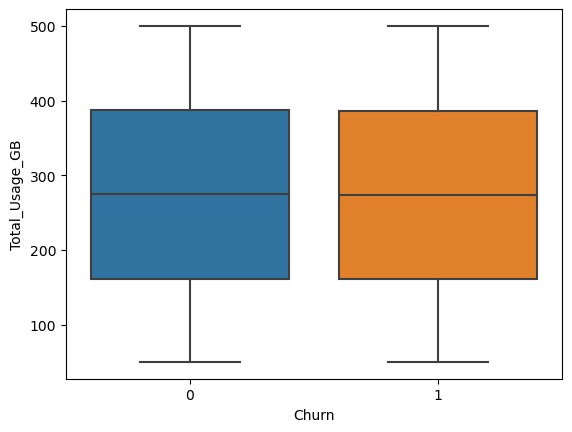

In [32]:
for i in df_num.columns:
    box1(i)

# Feature engineering

In [33]:
# Interaction effect 
# Age * Monthly_bill

In [34]:
df['Agewise-monthly bill']= df['Age']*df['Monthly_Bill']

In [35]:
# Age*Subscription_Length_Months

In [36]:
df['Agewise-subscriptionlength']=df['Age']*df['Subscription_Length_Months']

In [37]:
# Age*Total_Usage_GB

In [38]:
df['Age-Total_Usage_GB']=df['Age']*df['Total_Usage_GB']

In [39]:
# Monthly_Bill*12

In [40]:
df['yearly_bill']= df['Monthly_Bill']*12

In [41]:
#  Usage per month Total_Usage_GB/Subscription_Length_Months

In [42]:
df['Usage_per_month'] = df['Total_Usage_GB']/df['Subscription_Length_Months']

In [43]:
df['Age'].describe()

count    100000.000000
mean         44.027020
std          15.280283
min          18.000000
25%          31.000000
50%          44.000000
75%          57.000000
max          70.000000
Name: Age, dtype: float64

In [44]:
#Creating age bins

bins = [18, 25, 32, 39, 46, 53, 60, 70]
labels = ['18-25', '26-32', '33-39', '40-46', '47-53', '54-60', '61-70']

df['Age_Bin'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [45]:
df.Age_Bin.astype(object)

0        61-70
1        61-70
2        18-25
3        33-39
4        47-53
         ...  
99995    33-39
99996    61-70
99997    61-70
99998    47-53
99999    26-32
Name: Age_Bin, Length: 100000, dtype: object

In [46]:
df.Age_Bin.value_counts()

61-70    18798
54-60    13309
40-46    13241
26-32    13211
47-53    13210
33-39    13197
18-25    13113
Name: Age_Bin, dtype: int64

In [47]:
# For Age_bin (more than 2 groups) we perform kruskal test
# H0: There are no significant differences between the distributions of the groups
# Ha: There is at least one group with a different distribution

In [48]:
# Perform the Kruskal-Wallis test
group_1 = df[df['Age_Bin'] == '61-70']['Churn']
group_2 = df[df['Age_Bin'] == '54-60']['Churn']
group_3 = df[df['Age_Bin'] == '40-46']['Churn']
group_4 = df[df['Age_Bin'] == '26-32']['Churn']
group_5 = df[df['Age_Bin'] == '47-53']['Churn']
group_6 = df[df['Age_Bin'] == '33-39']['Churn']
group_7 = df[df['Age_Bin'] == '18-25']['Churn']
p = kruskal(group_1,group_2,group_3,group_4,group_5,group_6,group_7)[1]

In [49]:
p<0.05

False

In [50]:
# As pvalue greater than 0.05 hence There are no significant differences between the distributions of the groups

C:\Users\Admin\AppData\Local\Temp\ipykernel_8632\832035378.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

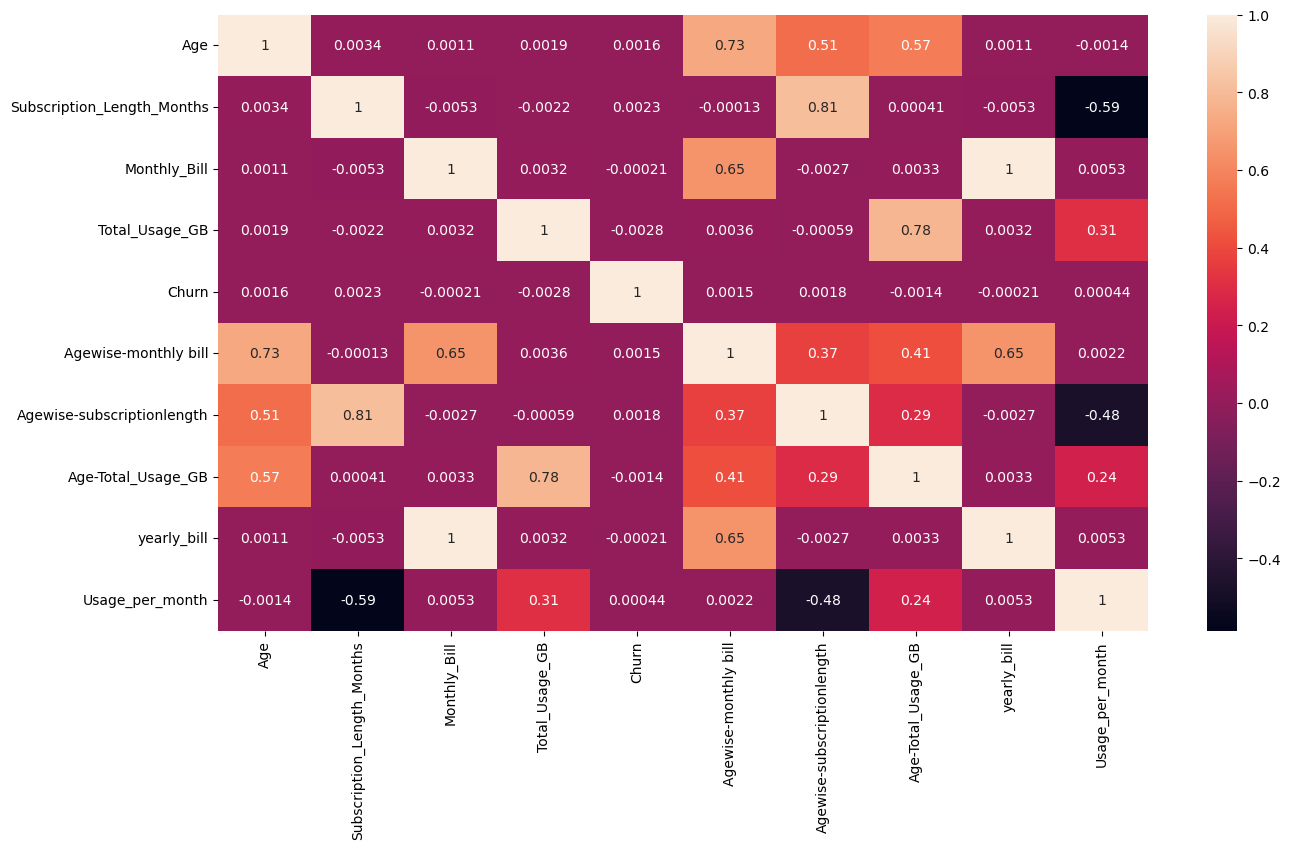

In [51]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [52]:
# As we can see correlation between Usage_per_month and churn is higher when compared with others verifying statistically

In [53]:
# Checking for normality
# H0: Data is normally distributed
# Ha: Data is not normally distributed

In [54]:
jarque_bera(df['Usage_per_month'])[1]

0.0

In [55]:
# As pvalue greater than 0.05 data is not normal hence performing non parametric test spearmanr
# H0: There is no monotonic relationship in the population
# Ha: There is a significant monotonic relationship in the population

In [56]:
spearmanr(df['Usage_per_month'],df['Churn'])[1]

0.35229164685563885

In [57]:
# pvalue greater than 0.05 hence There is no monotonic relationship in the population


# Normality test using jarquebera

In [58]:
# H0: Data is normally distributed
# Ha: Data is not normally distributed

In [59]:
for i in df.select_dtypes(include=np.number).columns:
    print(f'pvalue of {i}: {jarque_bera(df[i])[1]}')
    pvalues = {k:jarque_bera(df[k])[1] for k in df.select_dtypes(include=np.number).columns}

pvalue of Age: 0.0
pvalue of Subscription_Length_Months: 0.0
pvalue of Monthly_Bill: 0.0
pvalue of Total_Usage_GB: 0.0
pvalue of Churn: 0.0
pvalue of Agewise-monthly bill: 0.0
pvalue of Agewise-subscriptionlength: 0.0
pvalue of Age-Total_Usage_GB: 0.0
pvalue of yearly_bill: 0.0
pvalue of Usage_per_month: 0.0


In [60]:
pvalues

{'Age': 0.0,
 'Subscription_Length_Months': 0.0,
 'Monthly_Bill': 0.0,
 'Total_Usage_GB': 0.0,
 'Churn': 0.0,
 'Agewise-monthly bill': 0.0,
 'Agewise-subscriptionlength': 0.0,
 'Age-Total_Usage_GB': 0.0,
 'yearly_bill': 0.0,
 'Usage_per_month': 0.0}

In [61]:
# As pvalue<0.05 reject null hypothesis data is not normal

# Tranformation

In [62]:
# As data is not normal use box cox to transform

In [63]:
for column in df_num.columns:
    transformed_data, lambda_value = boxcox(df[column])
    df_num[column + '_BoxCox'] = transformed_data

In [64]:
df_num.drop(['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB'],axis=1,inplace=True)

In [65]:
df_num

,Age_BoxCox,Subscription_Length_Months_BoxCox,Monthly_Bill_BoxCox,Total_Usage_GB_BoxCox
0,28.536887,9.379739,31.691344,72.884957
1,28.180291,0.000000,23.014647,57.554879
2,13.142442,3.050958,35.679384,119.579306
3,18.291844,1.679711,39.638366,86.473918
4,22.256166,10.283332,26.430768,79.672941
...,...,...,...,...
99995,17.051080,12.016133,25.350949,70.571599
99996,28.180291,10.283332,27.672199,97.883627
99997,28.892074,9.379739,39.065776,76.306245
99998,24.155795,10.725232,23.197005,114.543030


# Statistical test for numeric features

In [66]:
# As data is not normal to check relation between numeric vs numeric columns we perform spearmanr test

In [67]:
# H0: There is no monotonic relationship in the population
# Ha: There is a significant monotonic relationship in the population

In [68]:
for i in df_num.columns:
    print(f'pvalue of {i}: {spearmanr(df_num[i], df["Churn"])[1]}')
    pvalues_num = {k:spearmanr(df_num[k], df["Churn"])[1] for k in df_num.columns}

pvalue of Age_BoxCox: 0.6229944425908982
pvalue of Subscription_Length_Months_BoxCox: 0.46132931265373367
pvalue of Monthly_Bill_BoxCox: 0.9513598874396686
pvalue of Total_Usage_GB_BoxCox: 0.3671600506876552


In [69]:
pvalues_num

{'Age_BoxCox': 0.6229944425908982,
 'Subscription_Length_Months_BoxCox': 0.46132931265373367,
 'Monthly_Bill_BoxCox': 0.9513598874396686,
 'Total_Usage_GB_BoxCox': 0.3671600506876552}

In [70]:
# AS pvalues greater than 0.05 failed to reject null hypothesis there is no significant relation between feature and target

# Statistical test for categorical feature

In [71]:
# For gender(2 groups) we perform mannwhitneyu test


In [72]:
# H0: There is no difference between the distributions of the two independent samples
# Ha: There is a difference between the distributions of the two independent samples

In [73]:
group_A = df[df['Gender'] == 'Male']['Churn']
group_B = df[df['Gender'] == 'Female']['Churn']

# Perform the Mann-Whitney U test
p_value_mannwhitneyu = mannwhitneyu(group_A, group_B)[1]

In [74]:
p_value_mannwhitneyu < 0.05

False

In [75]:
# Failed to reject null hypothesis hence There is no difference between the distributions of the two independent samples

In [76]:
# For Location (more than 2 groups) we perform kruskal test

In [77]:
# H0: There are no significant differences between the distributions of the groups
# Ha: There is at least one group with a different distribution

In [78]:
# Perform the Kruskal-Wallis test
grouped_data = [df['Churn'][df['Location'] == location] for location in df['Location'].unique()]
H, p_value_kruskal = kruskal(*grouped_data)

# Output the Kruskal-Wallis results
print("Kruskal-Wallis H-statistic:", H)
print("p-value:", p_value_kruskal)



Kruskal-Wallis H-statistic: 10.404066064700373
p-value: 0.03414442742604259


In [79]:
p_value_kruskal<0.05

True

In [80]:
# As pvalue < 0.05 we reject null hypothesis hence There is at least one group with a different distribution

# Scaling

In [81]:
ss = StandardScaler()
scaled_data = pd.DataFrame(ss.fit_transform(df_num),columns=df_num.columns).reset_index(drop=True)
scaled_data

,Age_BoxCox,Subscription_Length_Months_BoxCox,Monthly_Bill_BoxCox,Total_Usage_GB_BoxCox
0,1.214006,0.680706,0.440831,-0.221197
1,1.154839,-1.898801,-0.784410,-0.737289
2,-1.340286,-1.059762,1.003984,1.350784
3,-0.485882,-1.436867,1.563034,0.236280
4,0.171890,0.929202,-0.302018,0.007322
...,...,...,...,...
99995,-0.691753,1.405737,-0.454500,-0.299077
99996,1.154839,0.929202,-0.126715,0.620391
99997,1.272940,0.680706,1.482178,-0.106018
99998,0.487082,1.050728,-0.758659,1.181236


# Encoding

In [82]:
encoded_cat = pd.get_dummies(df.select_dtypes(exclude=np.number),drop_first=True)

In [83]:
encoded_cat

,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Bin_26-32,Age_Bin_33-39,Age_Bin_40-46,Age_Bin_47-53,Age_Bin_54-60,Age_Bin_61-70
0,1,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,1,0,0,0,0,1,0,0,0,0
99996,0,0,0,0,1,0,0,0,0,0,1
99997,1,0,0,0,0,0,0,0,0,0,1
99998,0,0,0,0,1,0,0,0,1,0,0


In [84]:
x= pd.concat([scaled_data,encoded_cat],axis=1)
y= df['Churn']

In [85]:
x

,Age_BoxCox,Subscription_Length_Months_BoxCox,Monthly_Bill_BoxCox,Total_Usage_GB_BoxCox,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Bin_26-32,Age_Bin_33-39,Age_Bin_40-46,Age_Bin_47-53,Age_Bin_54-60,Age_Bin_61-70
0,1.214006,0.680706,0.440831,-0.221197,1,0,1,0,0,0,0,0,0,0,1
1,1.154839,-1.898801,-0.784410,-0.737289,0,0,0,0,1,0,0,0,0,0,1
2,-1.340286,-1.059762,1.003984,1.350784,0,0,1,0,0,0,0,0,0,0,0
3,-0.485882,-1.436867,1.563034,0.236280,0,0,0,1,0,0,1,0,0,0,0
4,0.171890,0.929202,-0.302018,0.007322,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.691753,1.405737,-0.454500,-0.299077,1,1,0,0,0,0,1,0,0,0,0
99996,1.154839,0.929202,-0.126715,0.620391,0,0,0,0,1,0,0,0,0,0,1
99997,1.272940,0.680706,1.482178,-0.106018,1,0,0,0,0,0,0,0,0,0,1
99998,0.487082,1.050728,-0.758659,1.181236,0,0,0,0,1,0,0,0,1,0,0


In [86]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [87]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (70000, 15)
x_test (30000, 15)
y_train (70000,)
y_test (30000,)


# K-fold cross validation

In [88]:
cv = KFold(n_splits=5,shuffle=True,random_state=None)

In [89]:
clfs={
    'Logistic Regressor':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier() ,
    'Naive Bayes':GaussianNB()
}



# Before Transformation

In [266]:
# model_report=pd.DataFrame(columns=['model name','accuracy','recall','precision','f1_score','roc auc score'])

# for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
#     clf.fit(x_train,y_train)
#     print('Fitting Classifier.....',clf_name)
#     y_pred=clf.predict(x_test)
#     t=pd.Series({
#       'model name':clf_name,
#       'accuracy':accuracy_score(y_test,y_pred),
#       'recall':recall_score(y_test,y_pred),
#       'precision':precision_score(y_test,y_pred),
#       'f1_score':f1_score(y_test,y_pred),
#       'roc auc score':roc_auc_score(y_test,y_pred)
#     })
#     model_report=model_report.append(t,ignore_index=True)
# model_report=model_report.sort_values(by='f1_score',ascending=False)
# print(model_report)

Fitting Classifier..... Logistic Regressor


C:\Users\Admin\AppData\Local\Temp\ipykernel_9968\4021077235.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


Fitting Classifier..... KNN


C:\Users\Admin\AppData\Local\Temp\ipykernel_9968\4021077235.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


Fitting Classifier..... Decision Tree


C:\Users\Admin\AppData\Local\Temp\ipykernel_9968\4021077235.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


Fitting Classifier..... Random Forest
Fitting Classifier..... Naive Bayes
           model name  accuracy    recall  precision  f1_score  roc auc score
2       Decision Tree  0.503933  0.503022   0.500267  0.501641       0.503927
1                 KNN  0.505700  0.496172   0.502073  0.499105       0.505631
4         Naive Bayes  0.501500  0.472465   0.497701  0.484755       0.501289
3       Random Forest  0.501633  0.471323   0.497836  0.484217       0.501413
0  Logistic Regressor  0.502567  0.439624   0.498743  0.467321       0.502108


C:\Users\Admin\AppData\Local\Temp\ipykernel_9968\4021077235.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9968\4021077235.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


# After Transformation

In [90]:

model_report=pd.DataFrame(columns=['model name','accuracy','recall','precision','f1_score','roc auc score'])

for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(x_train,y_train)
    print('Fitting Classifier.....',clf_name)
    y_pred=clf.predict(x_test)
    t=pd.Series({
      'model name':clf_name,
      'accuracy':accuracy_score(y_test,y_pred),
      'recall':recall_score(y_test,y_pred),
      'precision':precision_score(y_test,y_pred),
      'f1_score':f1_score(y_test,y_pred),
      'roc auc score':roc_auc_score(y_test,y_pred)
    })
    model_report=model_report.append(t,ignore_index=True)
model_report=model_report.sort_values(by='f1_score',ascending=False)
print(model_report)

Fitting Classifier..... Logistic Regressor


C:\Users\Admin\AppData\Local\Temp\ipykernel_8632\4010169563.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


Fitting Classifier..... KNN


C:\Users\Admin\AppData\Local\Temp\ipykernel_8632\4010169563.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


Fitting Classifier..... Decision Tree


C:\Users\Admin\AppData\Local\Temp\ipykernel_8632\4010169563.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


Fitting Classifier..... Random Forest
Fitting Classifier..... Naive Bayes
           model name  accuracy    recall  precision  f1_score  roc auc score
4         Naive Bayes  0.503300  0.512827   0.499640  0.506148       0.503369
2       Decision Tree  0.501067  0.500470   0.497397  0.498929       0.501062
1                 KNN  0.500067  0.490396   0.496330  0.493345       0.499996
3       Random Forest  0.501767  0.480255   0.498015  0.488974       0.501610
0  Logistic Regressor  0.506733  0.457152   0.503402  0.479164       0.506372


C:\Users\Admin\AppData\Local\Temp\ipykernel_8632\4010169563.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8632\4010169563.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


In [91]:
# As we saw in statistical test there were no significant features except location ,
# so we cant except good f1 score from the model so trying adaboost or xgboost models

In [92]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print(f'f1 score of xgb :{f1_score(y_test,y_pred_xgb)}')
print(f'accuracy of xgb :{accuracy_score(y_test,y_pred_xgb)}')

f1 score of xgb :0.49468049061462355
accuracy of xgb :0.5028666666666667


In [93]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred_ada=ada.predict(x_test)
print(f'f1 score of adaboost :{f1_score(y_test,y_pred_ada)}')
print(f'accuracy of adaboost :{accuracy_score(y_test,y_pred_ada)}')


f1 score of adaboost :0.4648094367358646
accuracy of adaboost :0.5024333333333333


In [94]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print(f'f1 score of decisiontree :{f1_score(y_test,y_pred_dt)}')
print(f'accuracy of decisiontree :{accuracy_score(y_test,y_pred_dt)}')


f1 score of decisiontree :0.4981908335566872
accuracy of decisiontree :0.5007333333333334


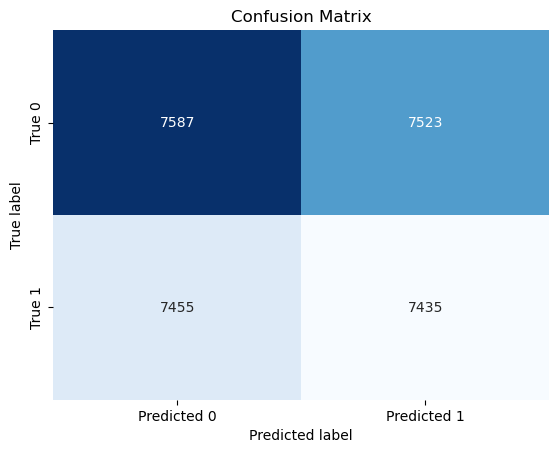

In [95]:
cm = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[f"Predicted {i}" for i in range(max(y_test)+1)],
            yticklabels=[f"True {i}" for i in range(max(y_test)+1)])

plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()







In [96]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15110
           1       0.50      0.50      0.50     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [97]:
fpr,tpr,_ = roc_curve(y_test,y_pred_dt)
roc_auc = auc(fpr,tpr)

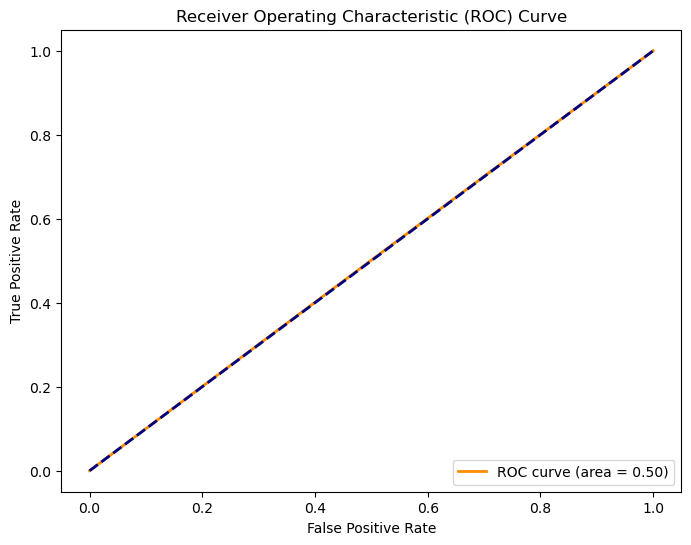

In [98]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Hyperparameter tuning (GridsearchCV)

In [99]:
# KNN

In [100]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

In [101]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=3)


In [102]:
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

y_pred_knn = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy)


Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Test Accuracy: 0.5004333333333333


In [103]:
# Decision tree

In [104]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [105]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

y_pred_dt1 = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_dt1)

print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Test Accuracy: 0.5011


In [110]:
import pickle
# model_pkl_file='Customer_churn.pkl'
# with open(model_pkl_file,'wb') as file:
#     pickle.dump(dt,file)
    
# with open(model_pkl_file,'rb') as file:
#     dt=pickle.load(file)
# y_pred_dt=dt.predict(x_test)


In [111]:
model_pkl_file = "Customer_churn.pkl"
with open(model_pkl_file, 'wb') as file:
    pickle.dump(dt, file)

In [199]:

# import pickle
# from sklearn.tree import DecisionTreeClassifier
# import sklearn


# model_pkl_file = 'Customer_churn.pkl'
# with open(model_pkl_file, 'wb') as file:
#     pickle.dump((dt, sklearn.__version__), file)

# # Load the model with scikit-learn version information
# with open(model_pkl_file, 'rb') as file:
#     loaded_model, loaded_sklearn_version = pickle.load(file)

# # Check for version consistency
# if sklearn.__version__ != loaded_sklearn_version:
#     print(f"Warning: Scikit-learn version mismatch. Loaded version: {loaded_sklearn_version}")

# # Use the loaded_model for predictions
# y_pred_dt = loaded_model.predict(x_test)

In [108]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.3.1
